<a href="https://colab.research.google.com/github/ZlataGlazunova/homeworks/blob/main/logreg_hometask_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

В рамках этого задания вам предстоить поработать с уже известным вам датасетом mnist из рукописных цифр. Вам необходимо выполнить многоклассовую классификацию и затем пройти валидацию с вашей моделью, достигнув определённого уровня accuracy. Здесь бОльшая часть кода уже готова, вам останется лишь реализовать ту его часть, где вы инициализируете и обучаете модель из библиотеки scikit-learn. При успешном прохождении валидации, в ячейке вы должны увидеть сообщение "Хорошая работа!". После этого запустите другие ячейки с вычислением различных метрик, чтоб лучше оценить качество своей модели. Успехов!

### Подсказка!!! (открывать, если совсем ступор)

__Подсказка: при инициализации модели есть параметры solver, penalty - посмотрите в документации, какие значения они могут принимать и добейтесь максимальной accuracy в зависимости от этих параметров__

# Импорт необходимых библиотек

In [1]:
!pip install scikit-plot

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Загрузка датасета и его визуализация

In [3]:
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(pandas.core.frame.DataFrame, NoneType, list, pandas.core.series.Series)

In [5]:
data = np.array(mnist.data)
targets = np.array(mnist.target)

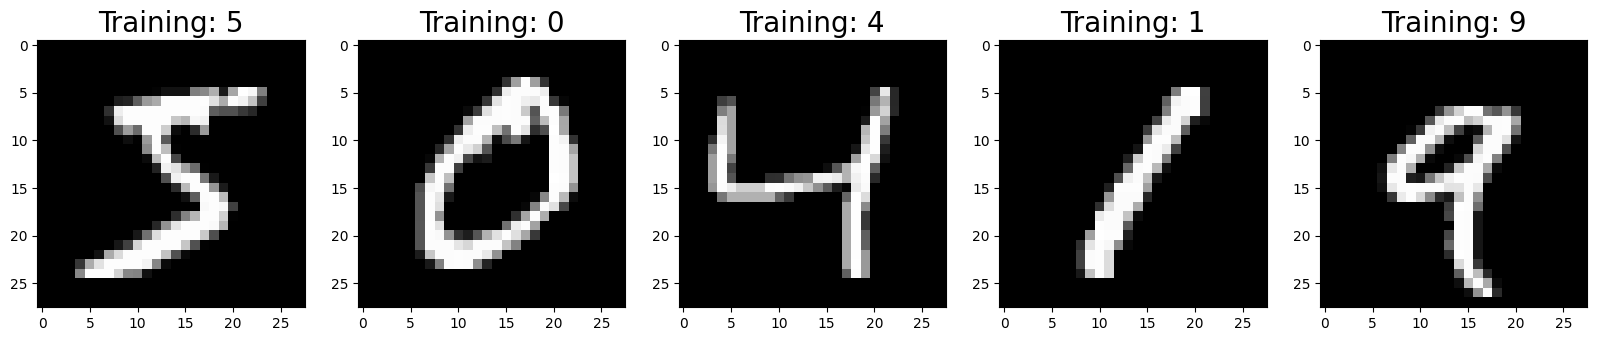

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data[0:5],
                                           targets[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20);

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[:10000,:],
                                                   targets[:10000].astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [9]:
X_train.shape, X_test.shape

((8571, 784), (1429, 784))

# Обучение модели

***Важно! Инициализируйте модель с параметрами n_jobs=5, tol=0.01 (чтоб процесс обучения был быстрее), а также max_iter= 1000.***

In [12]:
clf = LogisticRegression(penalty="l2", solver="saga", n_jobs=5, tol=0.01, max_iter= 1000)

In [13]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=5, solver='saga', tol=0.01)

# Валидация модели

In [14]:
y_pred = clf.predict(X_test)

In [15]:
accuracy = np.mean(y_pred == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.9, "попробуйте изменить следующие параметры: penalty, solver"

print('Хорошая работа!')

Test accuracy: 0.90483
Хорошая работа!


In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9048285514345696


In [17]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.9057498892095805


In [18]:
# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.9048285514345696


In [19]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

F1-Score: 0.9048507905923259


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

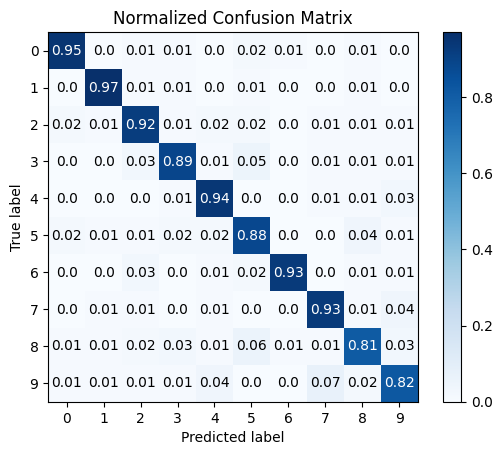

In [20]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       146
           1       0.96      0.97      0.96       145
           2       0.87      0.92      0.89       131
           3       0.91      0.89      0.90       168
           4       0.91      0.94      0.93       145
           5       0.82      0.88      0.85       128
           6       0.99      0.93      0.96       157
           7       0.89      0.93      0.91       137
           8       0.87      0.81      0.84       135
           9       0.86      0.82      0.84       137

    accuracy                           0.90      1429
   macro avg       0.90      0.90      0.90      1429
weighted avg       0.91      0.90      0.90      1429

